In [2]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import sys
import pathlib
import seaborn as sns


In [3]:
#make and save df
# Get the current working directory
current_path = os.getcwd()

# Navigate one level up to get the repo path (before 'src')
repo_path = os.path.dirname(current_path)

print("Current Path:", current_path)
print("Repo Path (before 'src'):", repo_path)
data_folder_path = os.path.join(repo_path, "data")
data_path = os.path.join(data_folder_path, "FullShotsData.csv")
df = pd.read_csv(data_path, index_col='player_id')
df


Current Path: e:\projects\Data engineering\Football-EDA\src
Repo Path (before 'src'): e:\projects\Data engineering\Football-EDA


,id,minute,result,X,Y,xG,player,h_a,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
player_id,,,,,,,,,,,,,,,,,,,
8865,378451.0,20,BlockedShot,0.876,0.602,0.019479,Ollie Watkins,h,OpenPlay,2020,Head,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,Matthew Cash,Aerial
8865,378458.0,54,MissedShots,0.878,0.430,0.031428,Ollie Watkins,h,OpenPlay,2020,Head,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,Trézéguet,Cross
8865,378464.0,77,MissedShots,0.858,0.679,0.060696,Ollie Watkins,h,OpenPlay,2020,RightFoot,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,John McGinn,Pass
8865,379954.0,34,MissedShots,0.831,0.655,0.127710,Ollie Watkins,a,OpenPlay,2020,RightFoot,14114,Fulham,Aston Villa,0,3,2020-09-28 17:00:00,Jack Grealish,TakeOn
8865,379956.0,46,MissedShots,0.943,0.500,0.445354,Ollie Watkins,a,FromCorner,2020,Head,14114,Fulham,Aston Villa,0,3,2020-09-28 17:00:00,Conor Hourihane,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,28658.0,58,MissedShots,0.673,0.499,0.008183,Florian Hartherz,h,SetPiece,2014,LeftFoot,5294,Paderborn,Bayern Munich,0,6,2015-02-21 14:30:00,NaN,NaN
4311,25266.0,14,MissedShots,0.762,0.744,0.014528,Idir Ouali,a,OpenPlay,2014,RightFoot,5430,Bayern Munich,Paderborn,4,0,2014-09-23 19:00:00,Christian Strohdiek,TakeOn
4311,25269.0,23,SavedShot,0.853,0.585,0.246003,Idir Ouali,a,OpenPlay,2014,RightFoot,5430,Bayern Munich,Paderborn,4,0,2014-09-23 19:00:00,Moritz Stoppelkamp,Pass


In [ ]:
# show 5 rows
display(df.head(5))

# Dataframe size and shape
df.shape
df.size

# General information
df.info()

# descriptive estadistics
display(df.describe())


,id,minute,result,X,Y,xG,player,h_a,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
player_id,,,,,,,,,,,,,,,,,,,
8865,378451.0,20,BlockedShot,0.876,0.602,0.019479,Ollie Watkins,h,OpenPlay,2020,Head,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,Matthew Cash,Aerial
8865,378458.0,54,MissedShots,0.878,0.430,0.031428,Ollie Watkins,h,OpenPlay,2020,Head,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,Trézéguet,Cross
8865,378464.0,77,MissedShots,0.858,0.679,0.060696,Ollie Watkins,h,OpenPlay,2020,RightFoot,14104,Aston Villa,Sheffield United,1,0,2020-09-21 17:00:00,John McGinn,Pass
8865,379954.0,34,MissedShots,0.831,0.655,0.127710,Ollie Watkins,a,OpenPlay,2020,RightFoot,14114,Fulham,Aston Villa,0,3,2020-09-28 17:00:00,Jack Grealish,TakeOn
8865,379956.0,46,MissedShots,0.943,0.500,0.445354,Ollie Watkins,a,FromCorner,2020,Head,14114,Fulham,Aston Villa,0,3,2020-09-28 17:00:00,Conor Hourihane,Cross


<class 'pandas.core.frame.DataFrame'>
Index: 292070 entries, 8865 to 4311
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               292070 non-null  float64
 1   minute           292070 non-null  int64  
 2   result           292070 non-null  object 
 3   X                292070 non-null  float64
 4   Y                292070 non-null  float64
 5   xG               292070 non-null  float64
 6   player           292070 non-null  object 
 7   h_a              292070 non-null  object 
 8   situation        292070 non-null  object 
 9   year             292070 non-null  int64  
 10  shotType         292070 non-null  object 
 11  match_id         292070 non-null  int64  
 12  h_team           292070 non-null  object 
 13  a_team           292070 non-null  object 
 14  h_goals          292070 non-null  int64  
 15  a_goals          292070 non-null  int64  
 16  date             292070 non-null  object 


,id,minute,X,Y,xG,year,match_id,h_goals,a_goals
count,292070.000000,292070.000000,292070.000000,292070.000000,292070.000000,292070.000000,292070.000000,292070.000000,292070.000000
mean,180836.924624,48.571801,0.843213,0.504781,0.107968,2016.653302,7044.213350,1.591800,1.245801
std,115471.138400,26.582925,0.089319,0.130116,0.160665,1.814234,4245.805379,1.334063,1.190026
min,1.000000,0.000000,0.003000,0.000000,0.000000,2014.000000,81.000000,0.000000,0.000000
25%,83240.250000,26.000000,0.779000,0.413000,0.023763,2015.000000,3520.000000,1.000000,0.000000
50%,164120.500000,49.000000,0.862000,0.502000,0.049402,2017.000000,7341.000000,1.000000,1.000000
75%,283388.750000,71.000000,0.908000,0.598000,0.093748,2018.000000,10438.000000,2.000000,2.000000
max,391215.000000,103.000000,0.999000,0.997000,0.979887,2020.000000,15885.000000,10.000000,9.000000


In [16]:
#Descriptive analysis
# Average Goals
print("Average number of goals at home:", df['a_goals'].mean())

# Average Expected Goals xG
print("Average Expected Goals:", df['xG'].mean())

# Average Assists xA
print("Average Assists :", df['h_goals'].mean())



# Standard deviation goals
print("Standard deviation goals :", df['a_goals'].std())

# Standard deviation expected goals
print("Standard deviation expected goals:", df['xG'].std())

# Standard deviation assists
print("Standard deviation assists:", df['h_goals'].std())

# Standard deviation assists 'a_goals'
print(df['a_goals'].describe())

# Description of the expected goals column
print(df['xG'].describe())

# Description of the Assists column
print(df['h_goals'].describe())

Average number of goals at home: 1.2458006642243298
Average Expected Goals: 0.1079684896179182
Average Assists : 1.5917999109802445
Standard deviation goals : 1.1900256262439945
Standard deviation expected goals: 0.16066477829600148
Standard deviation assists: 1.3340629052169728
count    292070.000000
mean          1.245801
std           1.190026
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: a_goals, dtype: float64
count    292070.000000
mean          0.107968
std           0.160665
min           0.000000
25%           0.023763
50%           0.049402
75%           0.093748
max           0.979887
Name: xG, dtype: float64
count    292070.000000
mean          1.591800
std           1.334063
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: h_goals, dtype: float64


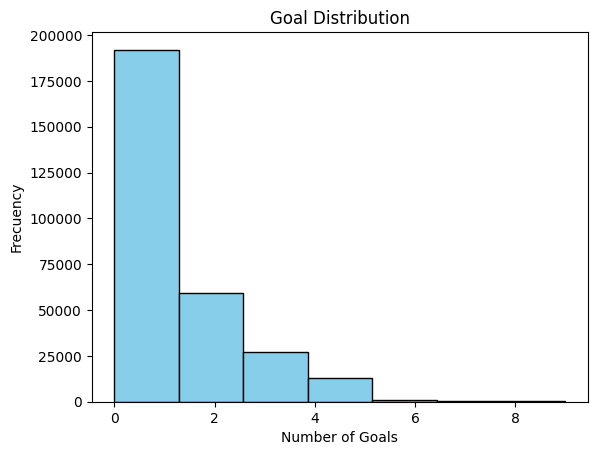

In [17]:
#Univariate Visualization
# make histograam
plt.hist(df['a_goals'], bins=7, color='skyblue', edgecolor='black')

# Add titles and tags
plt.title("Goal Distribution")
plt.xlabel("Number of Goals")
plt.ylabel("Frecuency")

# show the graphic
plt.show()



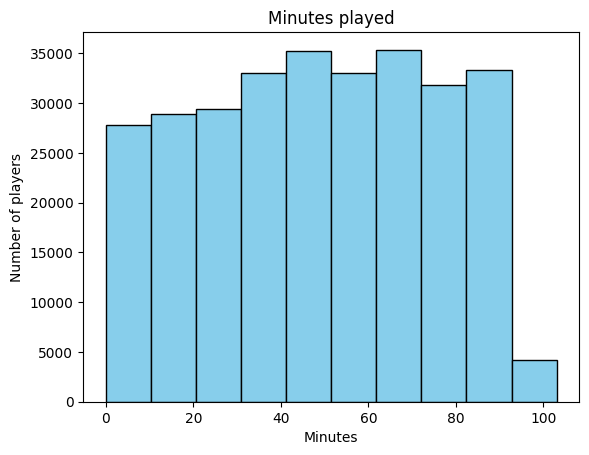

In [18]:
# Univariate Visualization, minutes
plt.hist(df['minute'], bins=10, color='skyblue', edgecolor='black')

# Add titles and tags
plt.title("Minutes played")
plt.xlabel("Minutes")
plt.ylabel("Number of players")

# show the graphic
plt.show()

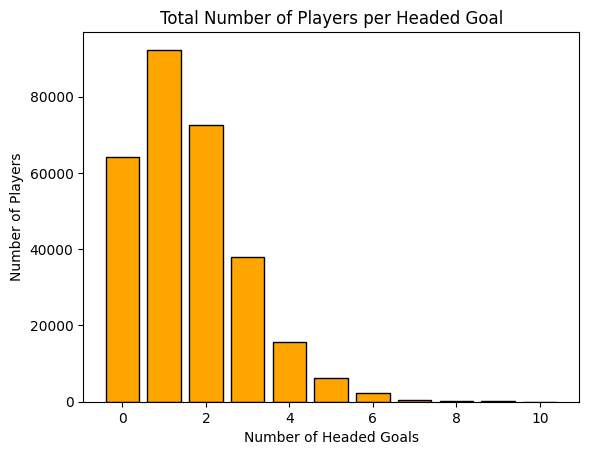

In [19]:
#Bar Chart
# Group by Column 'h_goals' and count the number of players
goles_cabeza = df['h_goals'].value_counts()

# make the bar chart 
plt.bar(goles_cabeza.index, goles_cabeza.values, color='orange', edgecolor='black')

# add tag and tittles
plt.title("Total Number of Players per Headed Goal")
plt.xlabel("Number of Headed Goals")
plt.ylabel("Number of Players")

# show the graphic
plt.show()

In [20]:
#null values
# Filter columns with at least one null value
columnas_con_nulos = df.isnull().sum()[df.isnull().sum() > 0]
# Convert the result to a DataFrame
resultado_df = columnas_con_nulos.reset_index()
resultado_df.columns = ['Column', 'Null values']
print(resultado_df)

            Column  Null values
0  player_assisted        77672
1       lastAction        33794


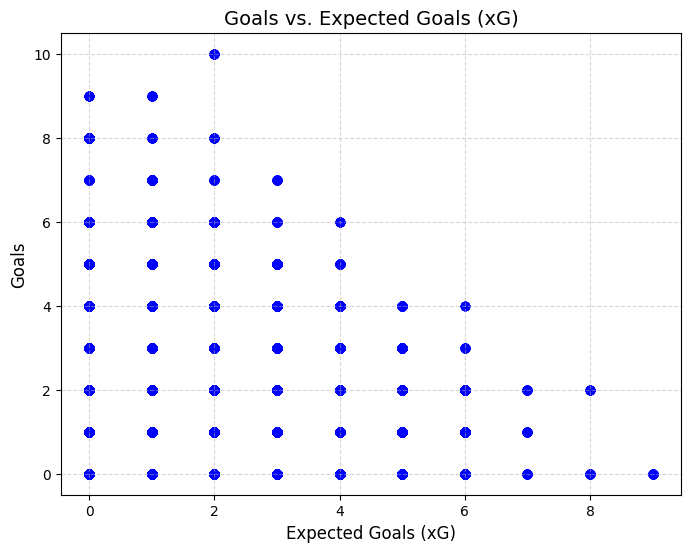

In [21]:
# Example data
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.a_goals, df.h_goals, color='blue', alpha=0.7)
plt.title('Goals vs. Expected Goals (xG)', fontsize=14)
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\SR_\AppData\Local\Temp\ipykernel_12744\1383251238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='result', x='a_goals', data=df, palette='Set2')


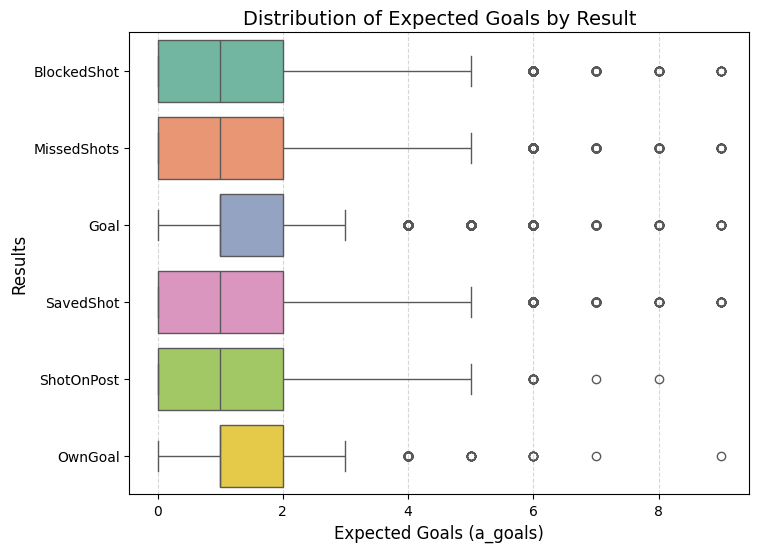

In [22]:
# make the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='result', x='a_goals', data=df, palette='Set2')
plt.title('Distribution of Expected Goals by Result', fontsize=14)
plt.xlabel('Expected Goals (a_goals)', fontsize=12)
plt.ylabel('Results', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

                id    minute         X         Y        xG      year  \
id        1.000000  0.004694  0.028686  0.004019  0.020912  0.982498   
minute    0.004694  1.000000  0.016625  0.001444  0.032173  0.005159   
X         0.028686  0.016625  1.000000 -0.009689  0.421577  0.028331   
Y         0.004019  0.001444 -0.009689  1.000000 -0.013601  0.004590   
xG        0.020912  0.032173  0.421577 -0.013601  1.000000  0.019677   
year      0.982498  0.005159  0.028331  0.004590  0.019677  1.000000   
match_id  0.867415  0.003106  0.019964  0.003832  0.018244  0.854365   
h_goals   0.004819 -0.014824  0.023559 -0.001929  0.083970  0.002823   
a_goals   0.043327 -0.001542  0.025853 -0.000189  0.064896  0.041703   

          match_id   h_goals   a_goals  
id        0.867415  0.004819  0.043327  
minute    0.003106 -0.014824 -0.001542  
X         0.019964  0.023559  0.025853  
Y         0.003832 -0.001929 -0.000189  
xG        0.018244  0.083970  0.064896  
year      0.854365  0.002823  0.0

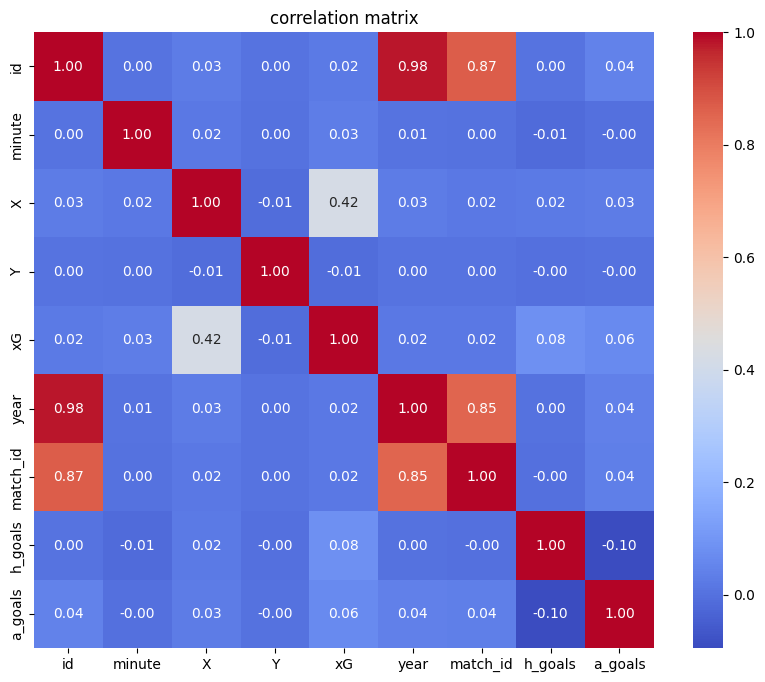

In [23]:
#Filter only the numeric columns
df_numerico = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
matriz_correlacion = df_numerico.corr()
print(matriz_correlacion)
# Populate NaN values with zeros before correlation
df_numerico = df_numerico.fillna(0)
print(df_numerico.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()

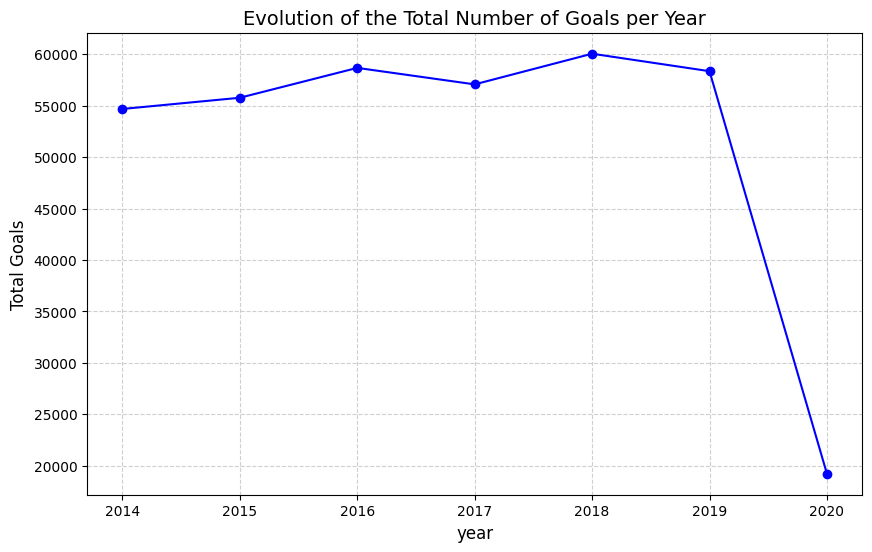

In [24]:
#Group by year and add up the goals
goles_por_año = df.groupby('year')['a_goals'].sum()
#Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(goles_por_año.index, goles_por_año.values, marker='o', linestyle='-', color='blue')
plt.title('Evolution of the Total Number of Goals per Year', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('Total Goals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()